<a href="https://colab.research.google.com/github/p-dros/Analysis/blob/main/classification/models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Based on
[Github repo](https://github.com/nicknochnack/PyCaret-Classification/blob/main/PyCaret_Classification.ipynb)

In [ ]:
!pip install pycaret

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

def plot_target_distribution(df_before, df_after, target_col='Bankrupt?'):
    plt.figure(figsize=(12, 5))

    # Plot before setup
    plt.subplot(1, 2, 1)
    sns.countplot(x=target_col, data=df_before)
    plt.title('Before Setup')
    plt.xlabel(target_col)
    plt.ylabel('Count')

    # Plot after setup
    plt.subplot(1, 2, 2)
    sns.countplot(x=target_col, data=df_after)
    plt.title('After Setup')
    plt.xlabel(target_col)
    plt.ylabel('Count')

    plt.tight_layout()
    plt.show()


In [ ]:
import pandas as pd

df = pd.read_csv('data.csv')
df.head(1)

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.40575,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.82789,0.290202,0.026601,0.56405,1,0.016469


In [ ]:
non_numeric_columns = df.select_dtypes(exclude='number').columns

print(non_numeric_columns)

Index([], dtype='object')


## Data setup

In [ ]:
from pycaret.classification import *

In [ ]:
s = setup(data=df, target='Bankrupt?', fix_imbalance=True, remove_multicollinearity = True, multicollinearity_threshold = 0.7)

,Description,Value
0,Session id,2978
1,Target,Bankrupt?
2,Target type,Binary
3,Original data shape,"(6819, 47)"
4,Transformed data shape,"(11284, 46)"
5,Transformed train set shape,"(9238, 46)"
6,Transformed test set shape,"(2046, 46)"
7,Numeric features,46
8,Preprocess,True
9,Imputation type,simple


In [ ]:
len(get_config('X_train').columns)

46

In [ ]:
df_after_setup = get_config('dataset_transformed')

### Fixing imbalance

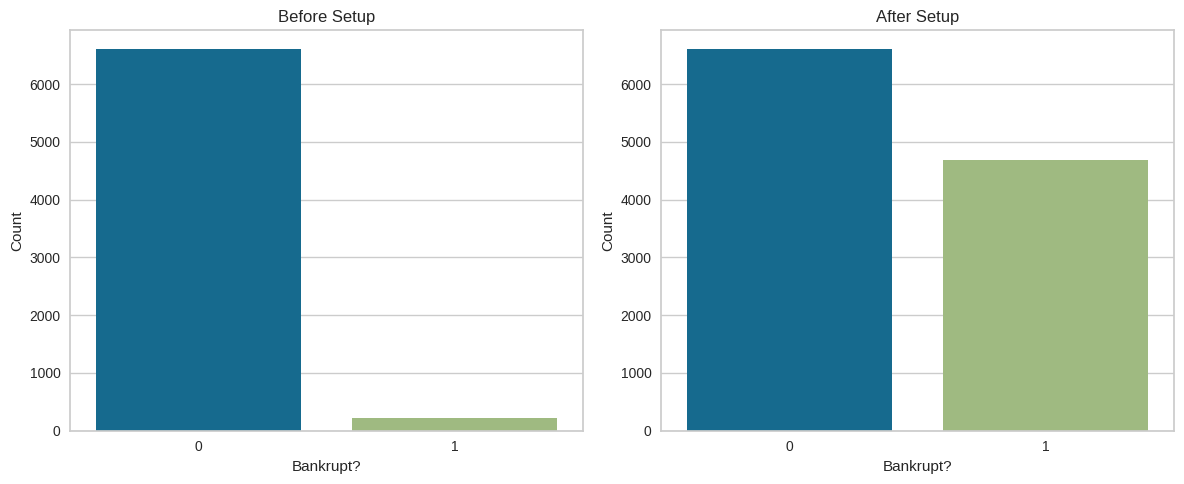

In [ ]:
plot_target_distribution(df, df_after_setup)

In [ ]:
best_model = compare_models(sort='Recall', include=['nb', 'lightgbm', 'xgboost', 'dummy', 'lr'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
nb,Naive Bayes,0.2993,0.6480,0.7679,0.1322,0.0732,0.0178,0.0354,1.3840
lightgbm,Light Gradient Boosting Machine,0.9621,0.9368,0.5267,0.4405,0.4705,0.4514,0.4581,6.3710
xgboost,Extreme Gradient Boosting,0.9638,0.9318,0.5050,0.4470,0.4638,0.4456,0.4518,0.9410
lr,Logistic Regression,0.7767,0.5975,0.3696,0.0567,0.0980,0.0446,0.0700,0.3620
dummy,Dummy Classifier,0.9677,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.1170


Processing:   0%|          | 0/25 [00:00<?, ?it/s]

In [ ]:
nb = best_model

## Plotting models

In [ ]:
model_name = 'xgboost'

In [ ]:
model = create_model(model_name)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9582,0.9337,0.3125,0.3571,0.3333,0.3118,0.3126
1,0.9623,0.9045,0.4375,0.4375,0.4375,0.4180,0.4180
2,0.9665,0.9596,0.6250,0.5000,0.5556,0.5384,0.5420
3,0.9727,0.9522,0.3333,0.6250,0.4348,0.4221,0.4442
4,0.9706,0.9235,0.4667,0.5385,0.5000,0.4850,0.4863
5,0.9539,0.9192,0.5333,0.3478,0.4211,0.3981,0.4080
6,0.9581,0.9482,0.6000,0.3913,0.4737,0.4529,0.4641
7,0.9644,0.9688,0.4000,0.4286,0.4138,0.3954,0.3957
8,0.9623,0.9007,0.6000,0.4286,0.5000,0.4810,0.4883


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
evaluate_model(model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…